In [2]:
import pandas as pd
import pandas.tseries
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
X = pd.read_csv('data/train.csv')
X.head()

,DATE (YYYY/MM/DD),MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11)
0,2020/01/01,00:00,-0.962276,0.000000,356.85640,7.216,0.988,-7.312,32.33,-1,9.95,271.3,806.779,0.0,0.219,0.0,0.0
1,2020/01/01,00:01,-0.937921,0.000000,357.65505,7.251,1.040,-7.260,32.40,-1,8.20,272.9,806.840,0.0,0.206,0.0,0.0
2,2020/01/01,00:02,-0.944395,0.000000,358.45438,7.256,1.093,-7.207,32.54,-1,6.70,288.8,806.876,0.0,0.148,0.0,0.0
3,2020/01/01,00:03,-0.951350,-0.029673,359.25416,7.254,1.060,-7.440,31.89,-1,7.70,294.0,806.823,0.0,0.235,0.0,0.0
4,2020/01/01,00:04,-0.934976,-0.054401,0.05415,7.331,1.081,-7.419,31.78,-1,7.20,285.5,806.762,0.0,0.182,0.0,0.0


In [4]:
X['Date'] = pd.to_datetime(X['DATE (YYYY/MM/DD)'] + " " + X['MST'])


In [5]:
X.drop(['DATE (YYYY/MM/DD)','MST'], axis=1, inplace=True)

In [134]:
X['Date'] = pd.to_datetime(X['Date'], format='%Y/%m/%d %H:%M')

KeyError: 'Date'

In [7]:
X.set_index('Date', inplace=True)

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 527040 entries, 2020-01-01 00:00:00 to 2020-12-31 23:59:00
Data columns (total 15 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Global CMP22 (vent/cor) [W/m^2]        527040 non-null  float64
 1   Direct sNIP [W/m^2]                    527040 non-null  float64
 2   Azimuth Angle [degrees]                527040 non-null  float64
 3   Tower Dry Bulb Temp [deg C]            527040 non-null  float64
 4   Tower Wet Bulb Temp [deg C]            527040 non-null  float64
 5   Tower Dew Point Temp [deg C]           527040 non-null  float64
 6   Tower RH [%]                           527040 non-null  float64
 7   Total Cloud Cover [%]                  527040 non-null  int64  
 8   Peak Wind Speed @ 6ft [m/s]            527040 non-null  float64
 9   Avg Wind Direction @ 6ft [deg from N]  527040 non-null  float64
 10  Station Pressure [mBar

In [132]:
data= X['Direct sNIP [W/m^2]']

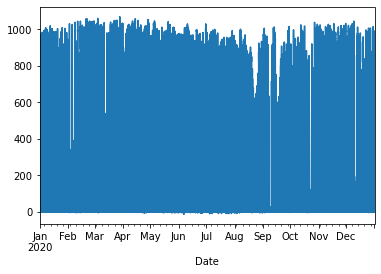

In [138]:
X['Direct sNIP [W/m^2]'].plot()
plt.show()

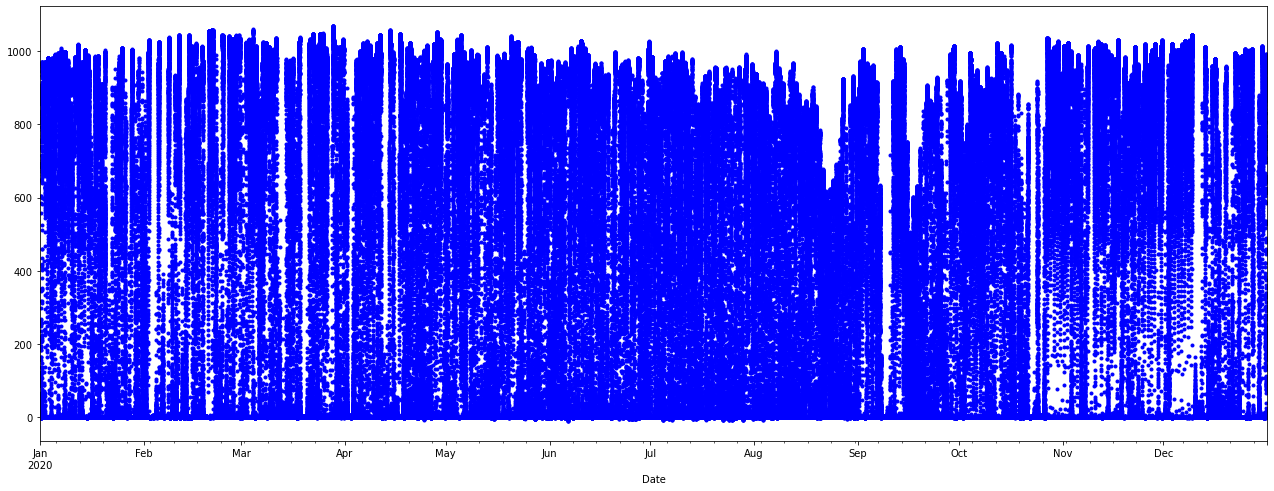

In [10]:
X['Direct sNIP [W/m^2]'].plot(figsize=(22,8), style='b.')
plt.show()

In [117]:
#groupby year
month_groups=X['Direct sNIP [W/m^2]'].groupby(pd.Grouper(freq=('M')))

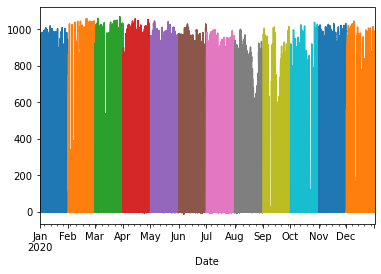

In [118]:
month_groups.plot();

In [119]:
temp_monthly=pd.DataFrame() 


In [120]:
count =0
for val, group in month_groups:
    if group < 0: 
        count += 1
print(count)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [121]:
temp_monthly

""


In [122]:
for mnth, group in month_groups:
    group = abs(group)

In [123]:
for mnth, group in month_groups:
    temp_monthly[mnth.month] = group.values.ravel()


ValueError: Length of values (41760) does not match length of index (44640)

In [124]:
month_groups.count()


Date
2020-01-31    44640
2020-02-29    41760
2020-03-31    44640
2020-04-30    43200
2020-05-31    44640
2020-06-30    43200
2020-07-31    44640
2020-08-31    44640
2020-09-30    43200
2020-10-31    44640
2020-11-30    43200
2020-12-31    44640
Freq: M, Name: Direct sNIP [W/m^2], dtype: int64

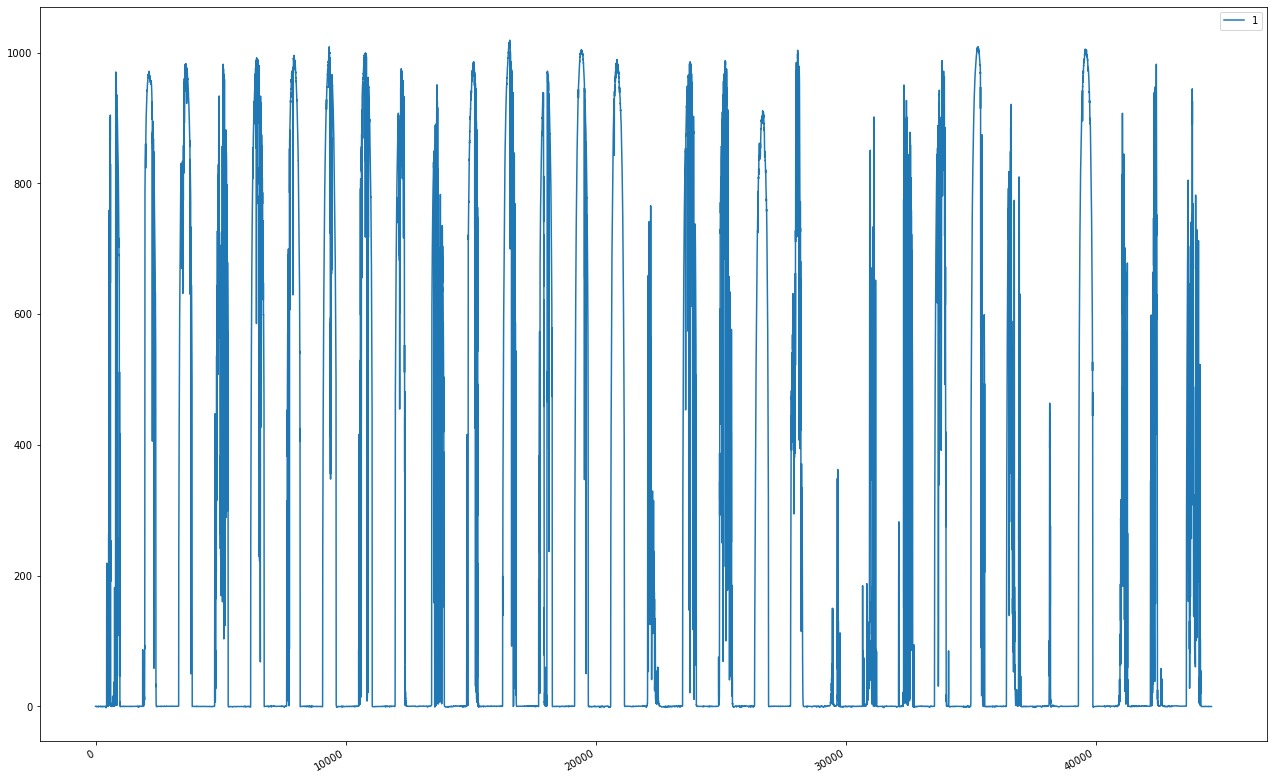

In [125]:
temp_monthly.plot(figsize=(22,15), subplots=True, legend=True)
plt.show()


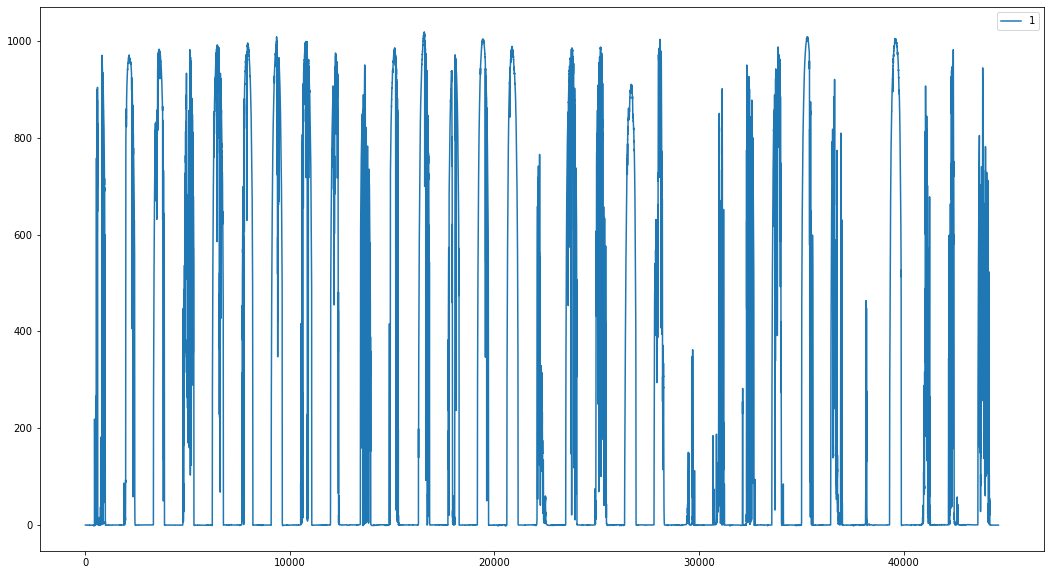

In [126]:
temp_monthly.plot(figsize=(18,10), subplots=False, legend=True)
plt.show()


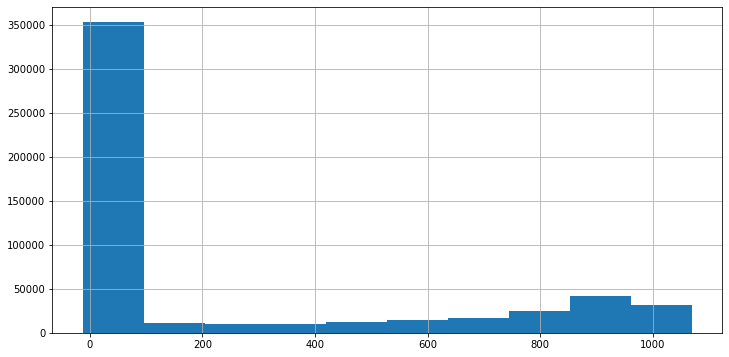

In [127]:
X['Direct sNIP [W/m^2]'].hist(figsize=(12,6))
plt.show()

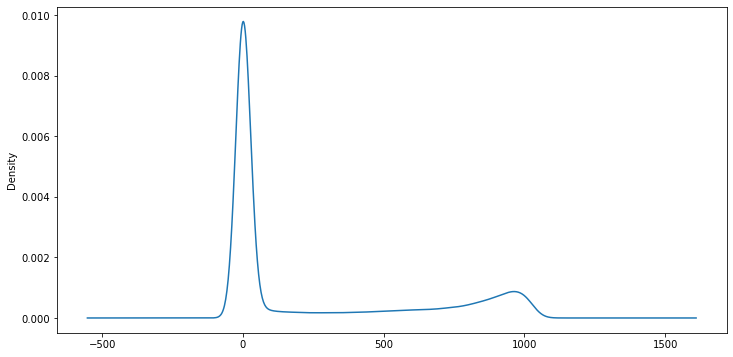

In [128]:
X['Direct sNIP [W/m^2]'].plot(kind='kde', figsize=(12,6))
plt.show()

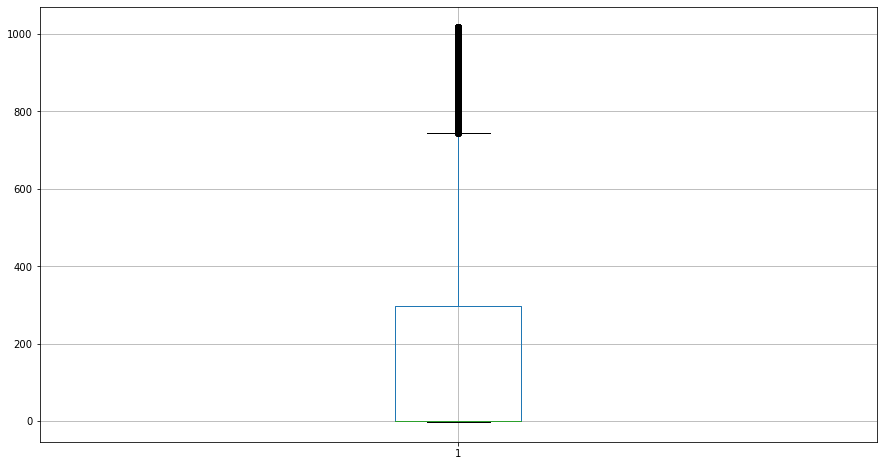

In [131]:
temp_monthly.boxplot(figsize=(15,8))
plt.show()

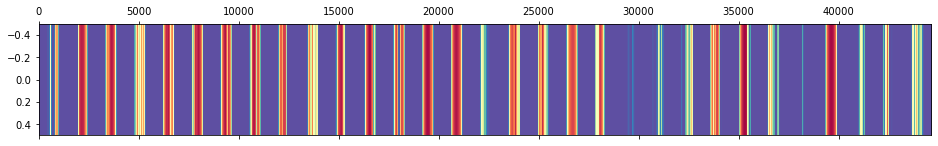

In [130]:
month_matrix=temp_monthly.T
# Draw a heatmap with matshow()
plt.matshow( month_matrix, interpolation=None, aspect='auto', cmap=plt.cm.Spectral_r)
plt.show()


In [ ]:
# What to do with other columns?

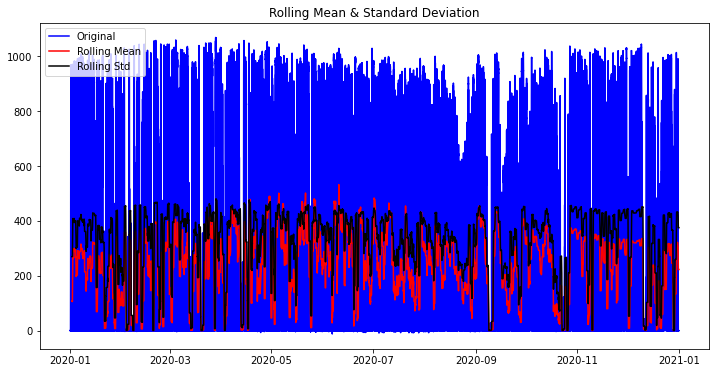

In [143]:
#Testing for Trends
roll_mean=data.rolling(window=1440, center=False).mean()
roll_std=data.rolling(window=1440, center=False).std()
# Plot rolling statistics
fig=plt.figure(figsize=(12,6))
plt.plot(data, color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()


In [145]:
#Dickey-Fuller
from statsmodels.tsa.stattools import adfuller
# Perform Dickey-Fuller test:
# print('Results of Dickey-Fuller Test: \n')
dftest=adfuller(data)


In [ ]:
# Extract and display test results in a user friendly manner
df_output=pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
     df_output['Critical Value (%s)'%key] = value


In [ ]:
#removing Trends

In [ ]:
#decomposition

In [ ]:
#Modeling

In [ ]:
#correlation and Autocorrelation

In [ ]:
p = d = q = range(0,3) # This will test all variations of the three parameters using values 0-2
pdq = list(itertools.product(p,d,q))
# This will test all variation of the 3 seasonal parameters.  12 indicates the number of months in a year
seasonal_pdq = [(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]
print('Examples of parameters for SARIMA:')
print('SARIMAX: {} x {}'.format(pdq[0],seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[10],seasonal_pdq[13]))
print('SARIMAX: {} x {}'.format(pdq[-1],seasonal_pdq[-1]))

In [ ]:
from statsmodels.tsa.statespace import SARIMAX 
#Progression to SARIMA
SARIMAX_dict1 = {'stats':[],'aic':[]} # Dictionary mackes it easy to look through results when finished
for param in pdq:  # Only run again if we need to re-optimize
    for param_seasonal in seasonal_pdq:
        try:
            mod=SARIMAX(train,
                         order=param,
                         seasonal_order=param_seasonal,
                         enforce_stationarity=False,
                         enforce_invertibility=False)
            results = mod.fit()
            SARIMAX_dict1['stats'].append('ARIMA{}x{}'.format(param,param_seasonal))
            SARIMAX_dict1['aic'].append(results.aic)
            print('ARIMA{}x{} - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            print('Oops!')
            continue
df_sar = pd.DataFrame(SARIMAX_dict1)
df_sar.to_csv('data/SARIMAX_dict1.csv')